In [51]:
import pandas as pd
import numpy as np
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import power_transform
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [52]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [54]:
df.shape

(8425, 23)

In [55]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [56]:
df.isnull().sum().sum()

19472

In [57]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [58]:
#we can clearly see that there are no null values.so we can continue with the data

df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [59]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [60]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [61]:
#we will fill the null values by .fillna method bymean or mode
df['MinTemp'].fillna(df['MinTemp'].mode()[0],inplace=True )
df['MaxTemp'].fillna(df['MaxTemp'].mode()[0],inplace=True )
df['Temp9am'].fillna(df['Temp9am'].mode()[0],inplace=True )
df['Temp3pm'].fillna(df['Temp3pm'].mode()[0],inplace=True )
df['Humidity9am'].fillna(df['Humidity9am'].mode()[0],inplace=True )
df['Humidity3pm'].fillna(df['Humidity3pm'].mode()[0],inplace=True )
df['Rainfall']=df['Rainfall'].fillna(0)
df['Pressure9am'].fillna(df['Pressure9am'].median(),inplace=True )
df['Pressure3pm'].fillna(df['Pressure3pm'].median(),inplace=True )
df['WindSpeed9am'].fillna(df['WindSpeed9am'].median(),inplace=True )
df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median(),inplace=True )
df['WindGustSpeed'].fillna(df['WindGustSpeed'].median(),inplace=True)
df['Evaporation'].fillna(df['Evaporation'].median(),inplace=True)
df['Sunshine'].fillna(df['Sunshine'].median(),inplace=True)
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0],inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0],inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0],inplace=True)
df['Cloud9am'].fillna(df['Cloud9am'].median(),inplace=True)
df['Cloud3pm'].fillna(df['Cloud3pm'].median(),inplace=True)
df['RainToday'].fillna(df['RainToday'].mode()[0],inplace=True)
df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0],inplace=True)


In [62]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.716554,0.085226,0.263077,0.031242,0.230313,0.137219,0.178676,-0.131170,0.077566,-0.429389,-0.422953,0.078357,0.022112,0.886777,0.687180
MaxTemp,0.716554,1.000000,-0.086542,0.326572,0.355659,0.139978,0.016198,0.089431,-0.391472,-0.422893,-0.324840,-0.402087,-0.254793,-0.253004,0.864741,0.973412
Rainfall,0.085226,-0.086542,1.000000,0.020252,-0.166957,0.082628,0.048726,0.021594,0.227291,0.234625,-0.069595,-0.031261,0.176615,0.142066,-0.007002,-0.089931
Evaporation,0.263077,0.326572,0.020252,1.000000,0.217816,0.147367,0.133320,0.121595,-0.235317,-0.170088,-0.177701,-0.189711,-0.078895,-0.119121,0.316614,0.318278
Sunshine,0.031242,0.355659,-0.166957,0.217816,1.000000,-0.034623,-0.068995,-0.004683,-0.316184,-0.420418,0.025163,-0.032167,-0.489100,-0.511608,0.219135,0.375341
WindGustSpeed,0.230313,0.139978,0.082628,0.147367,-0.034623,1.000000,0.606090,0.639042,-0.271896,-0.093647,-0.407139,-0.372553,0.019763,0.070237,0.202291,0.102218
WindSpeed9am,0.137219,0.016198,0.048726,0.133320,-0.068995,0.606090,1.000000,0.560340,-0.358553,-0.111581,-0.175584,-0.139429,-0.006931,0.047359,0.109860,0.000140
WindSpeed3pm,0.178676,0.089431,0.021594,0.121595,-0.004683,0.639042,0.560340,1.000000,-0.251098,-0.091026,-0.252752,-0.208694,-0.000171,-0.001803,0.184253,0.065625
Humidity9am,-0.131170,-0.391472,0.227291,-0.235317,-0.316184,-0.271896,-0.358553,-0.251098,1.000000,0.633913,0.142547,0.173575,0.399331,0.295328,-0.378946,-0.383237
Humidity3pm,0.077566,-0.422893,0.234625,-0.170088,-0.420418,-0.093647,-0.111581,-0.091026,0.633913,1.000000,0.001619,0.070234,0.408086,0.421099,-0.132231,-0.491816


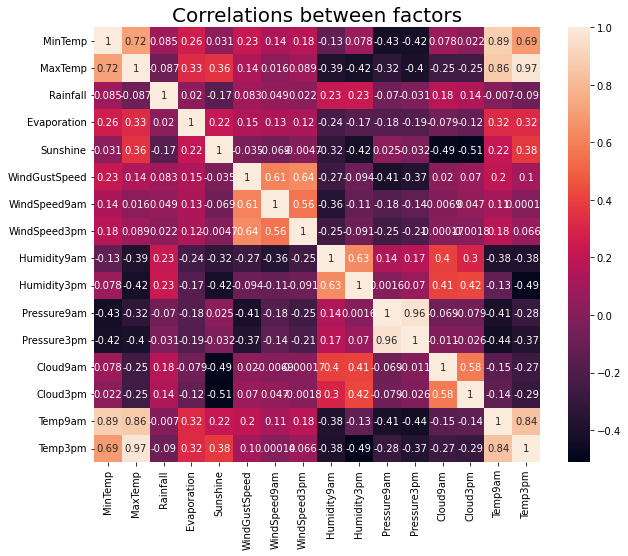

In [63]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlations between factors',fontsize=20)
plt.savefig('correlation_between _factors.jpg')
plt.show()

In [64]:
#using label encoder for categorical target (churn) for encoding 
le=LabelEncoder()
df['RainToday']=le.fit_transform(df['RainToday'])

In [65]:
le.inverse_transform([0,1])

array(['No', 'Yes'], dtype=object)

In [66]:
le=LabelEncoder()
df['RainTomorrow']=le.fit_transform(df['RainTomorrow'])

In [67]:
le.inverse_transform([0,1])

array(['No', 'Yes'], dtype=object)

In [68]:
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.0,1.0,13.4,22.9,0.6,4.6,8.7,13.0,44.0,13.0,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,1.0,1.0,7.4,25.1,0.0,4.6,8.7,14.0,44.0,6.0,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,2.0,1.0,12.9,25.7,0.0,4.6,8.7,15.0,46.0,13.0,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,3.0,1.0,9.2,28.0,0.0,4.6,8.7,4.0,24.0,9.0,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,4.0,1.0,17.5,32.3,1.0,4.6,8.7,13.0,41.0,1.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2999.0,9.0,2.8,23.4,0.0,4.6,8.7,0.0,31.0,9.0,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0,0
8421,3000.0,9.0,3.6,25.3,0.0,4.6,8.7,6.0,22.0,9.0,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0,0
8422,3001.0,9.0,5.4,26.9,0.0,4.6,8.7,3.0,37.0,9.0,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0,0
8423,3002.0,9.0,7.8,27.0,0.0,4.6,8.7,9.0,28.0,10.0,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [69]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.0,1.0,13.4,22.9,0.6,4.6,8.7,13.0,44.0,13.0,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,1.0,1.0,7.4,25.1,0.0,4.6,8.7,14.0,44.0,6.0,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,2.0,1.0,12.9,25.7,0.0,4.6,8.7,15.0,46.0,13.0,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,3.0,1.0,9.2,28.0,0.0,4.6,8.7,4.0,24.0,9.0,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,4.0,1.0,17.5,32.3,1.0,4.6,8.7,13.0,41.0,1.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2999.0,9.0,2.8,23.4,0.0,4.6,8.7,0.0,31.0,9.0,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0,0
8421,3000.0,9.0,3.6,25.3,0.0,4.6,8.7,6.0,22.0,9.0,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0,0
8422,3001.0,9.0,5.4,26.9,0.0,4.6,8.7,3.0,37.0,9.0,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0,0
8423,3002.0,9.0,7.8,27.0,0.0,4.6,8.7,9.0,28.0,10.0,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


0    6435
1    1990
Name: RainToday, dtype: int64

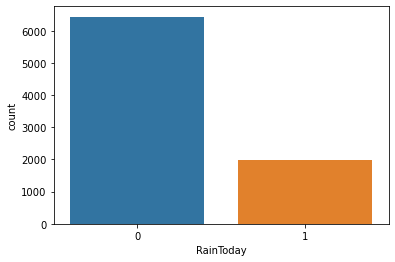

In [70]:
#now we see the count of loan status
sns.countplot(df['RainToday'])
df['RainToday'].value_counts()

In [71]:
#loan application approved more no of times than it is rejected.....

correlations = df.corr()['RainToday'].sort_values(ascending=False)
print(correlations)

RainToday        1.000000
Rainfall         0.464941
Humidity9am      0.373285
Humidity3pm      0.358895
RainTomorrow     0.312929
Cloud9am         0.272066
Cloud3pm         0.233150
WindDir9am       0.157324
WindGustDir      0.125188
WindDir3pm       0.100125
WindGustSpeed    0.076890
MinTemp          0.065191
WindSpeed9am     0.035575
WindSpeed3pm     0.015211
Location         0.003071
Date            -0.011365
Pressure3pm     -0.033976
Evaporation     -0.090225
Temp9am         -0.096325
Pressure9am     -0.104390
MaxTemp         -0.222793
Sunshine        -0.228963
Temp3pm         -0.233437
Name: RainToday, dtype: float64


<AxesSubplot:>

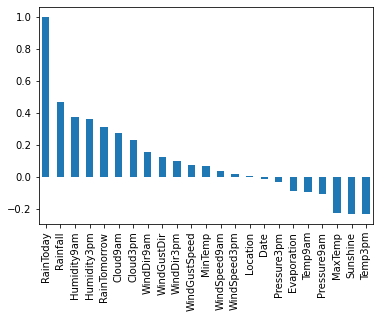

In [72]:
#the attributes share positive as well as negaative correlation with the target

correlations.plot(kind='bar')

<AxesSubplot:xlabel='RainToday', ylabel='Humidity9am'>

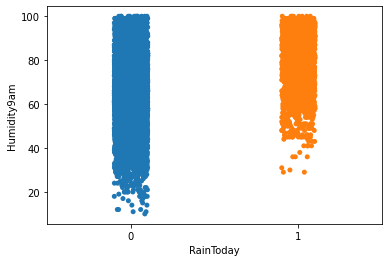

In [73]:
sns.stripplot(x='RainToday',y='Humidity9am', data=df)

In [ ]:
#when humidity is above 40% then their is max chance of rain

<AxesSubplot:xlabel='RainToday', ylabel='Humidity3pm'>

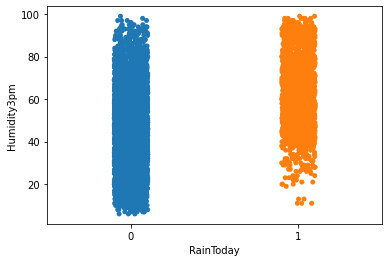

In [74]:
sns.stripplot(x='RainToday',y='Humidity3pm', data=df)

In [ ]:
#in this time zone when humidity is above 30% then their is max chances of rainfall

<AxesSubplot:xlabel='RainToday', ylabel='MinTemp'>

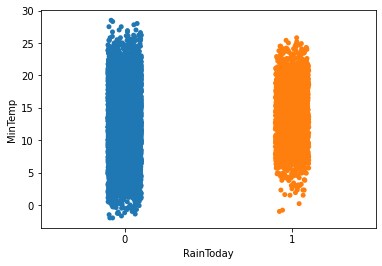

In [77]:
sns.stripplot(x='RainToday',y='MinTemp', data=df)

In [ ]:
#when min temp is between 5-20 then their are high chances of rain

<AxesSubplot:xlabel='RainToday', ylabel='MaxTemp'>

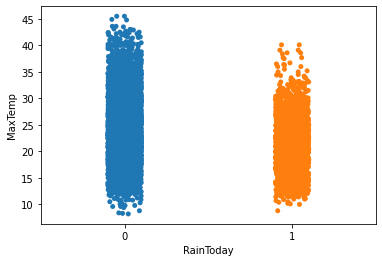

In [160]:
sns.stripplot(x='RainToday',y='MaxTemp', data=df)

In [ ]:
#when max temp is between 12-30 then their are max chances of rain

<AxesSubplot:xlabel='RainToday', ylabel='WindGustSpeed'>

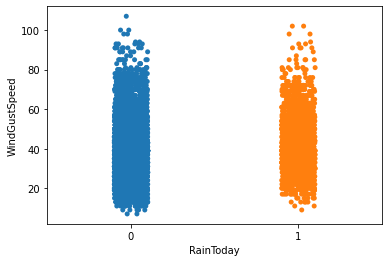

In [163]:
sns.stripplot(x='RainToday',y='WindGustSpeed', data=df)

In [ ]:
#when wind gust speed is between 20 -60 then there are max chances of rainfall

<AxesSubplot:xlabel='Humidity9am', ylabel='Cloud9am'>

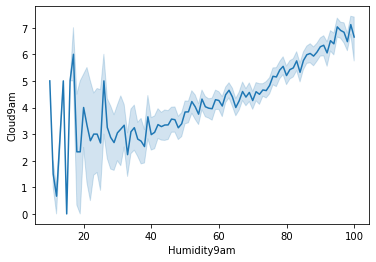

In [162]:
sns.lineplot(y='Cloud9am',x='Humidity9am', data=df)

In [ ]:
#when their are clouds then we can expect humidity but not more as the temp is low at morning

<AxesSubplot:xlabel='Humidity3pm', ylabel='Cloud3pm'>

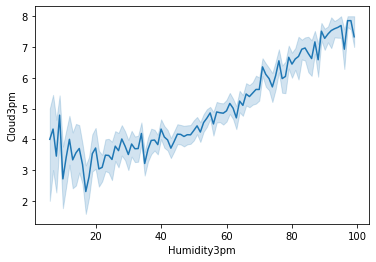

In [120]:
sns.lineplot(y='Cloud3pm',x='Humidity3pm', data=df)

In [ ]:
#but at this time the same clouds can createmore humidity

<AxesSubplot:xlabel='RainToday', ylabel='Humidity3pm'>

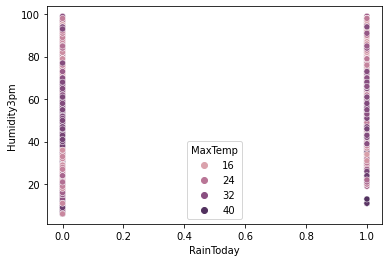

In [123]:
sns.scatterplot(x="RainToday", y="Humidity3pm", hue="MaxTemp", data=df)

In [ ]:
#so we can say by this plot that humidity is more at peak day time and the chances of rainfall are more at that time 

<AxesSubplot:xlabel='RainToday', ylabel='Humidity9am'>

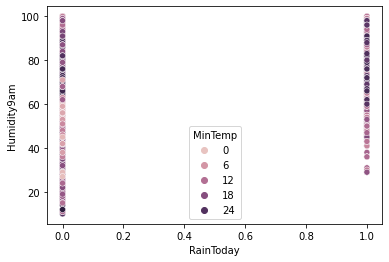

In [124]:
sns.scatterplot(x="RainToday", y="Humidity9am", hue="MinTemp", data=df)

In [ ]:
#in this plot it is clear that when temp is low humidityis higher

In [125]:
#dropping target column and unwanted columns:
X = df.drop(columns=['RainToday','RainTomorrow'])
y = df['RainToday']

In [127]:
df.skew()

Date              0.386560
Location         -0.050456
MinTemp          -0.084104
MaxTemp           0.391512
Rainfall         13.200523
Evaporation      14.064000
Sunshine         -1.189333
WindGustDir       0.119640
WindGustSpeed     0.786153
WindDir9am        0.172792
WindDir3pm       -0.119847
WindSpeed9am      0.962761
WindSpeed3pm      0.492365
Humidity9am      -0.262767
Humidity3pm       0.110858
Pressure9am      -0.028521
Pressure3pm      -0.015018
Cloud9am         -0.514801
Cloud3pm         -0.457713
Temp9am          -0.005160
Temp3pm           0.412119
RainToday         1.242362
RainTomorrow      1.241588
dtype: float64

In [128]:
#now we remove skewness by power transform...

x_new=power_transform(X)

In [130]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

4     1.028215
5     0.012404
8     0.010481
15    0.002744
16    0.002018
20   -0.009349
3    -0.010224
12   -0.037960
14   -0.040070
19   -0.048325
13   -0.068790
11   -0.078875
2    -0.101517
9    -0.155025
0    -0.166431
1    -0.186657
7    -0.187177
6    -0.229385
10   -0.248689
18   -0.288661
17   -0.344988
dtype: float64

In [131]:
#Data scaling Z=(X-mean)/std:

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [132]:
X_scaled.shape[1]

21

In [133]:
round(y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    76.38 %
1    23.62 %
Name: RainToday, dtype: object

In [134]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [135]:
ros.fit(X, y)

RandomOverSampler(random_state=42)

In [136]:
RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [137]:
round(y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: RainToday, dtype: object

In [138]:
#now train and test split  and training and fitting test model at random state 0 so that we can find best random state:
for i in range(0,100):
    X_train,X_test,y_train,y_test =train_test_split(X_scaled,y,test_size=0.2,random_state=i)
    reg=LogisticRegression()
    reg.fit(X_train,y_train)
    pred_train = reg.predict(X_train)
    y_pred= reg.predict(X_test)
    print(f"At random state{i},the training accuracy is:-{accuracy_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is:-{accuracy_score(y_test,y_pred)}")
    print("\n")

At random state0,the training accuracy is:-0.979673590504451
At random state0,the testing accuracy is:-0.9762611275964391


At random state1,the training accuracy is:-0.9787833827893175
At random state1,the testing accuracy is:-0.9762611275964391


At random state2,the training accuracy is:-0.9795252225519288
At random state2,the testing accuracy is:-0.9833827893175074


At random state3,the training accuracy is:-0.9799703264094956
At random state3,the testing accuracy is:-0.9744807121661722


At random state4,the training accuracy is:-0.9805637982195846
At random state4,the testing accuracy is:-0.9792284866468842


At random state5,the training accuracy is:-0.9790801186943621
At random state5,the testing accuracy is:-0.9816023738872404


At random state6,the training accuracy is:-0.9799703264094956
At random state6,the testing accuracy is:-0.9792284866468842


At random state7,the training accuracy is:-0.9810089020771513
At random state7,the testing accuracy is:-0.9780415430267062


A

In [139]:
#so as we can interpret random state 8 is giving best train and test accuracy,so we train our model at random state 42:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

In [140]:
X_train.shape

(6740, 21)

In [141]:
y_train.shape

(6740,)

In [142]:
X_test.shape

(1685, 21)

In [143]:
y_test.shape

(1685,)

In [144]:
#now fitting our data to Machine learning models :

reg=LogisticRegression()
reg.fit(X_train,y_train)
y_pred= reg.predict(X_test)   
reg.score(X_train,y_train)
reg_score=accuracy_score(y_test,y_pred)
print('accuracy score:',reg_score*100)

regscore=cross_val_score(reg,X,y,cv=5)
lr=regscore.mean()
print('cross val score:',lr*100)
print(classification_report(y_test,y_pred))

accuracy score: 98.63501483679525
cross val score: 97.56676557863501
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1275
           1       0.98      0.96      0.97       410

    accuracy                           0.99      1685
   macro avg       0.98      0.98      0.98      1685
weighted avg       0.99      0.99      0.99      1685



In [145]:
svm= SVC()  
svm.fit(X_train, y_train)  
svm.score(X_train,y_train)
y_pred=svm.predict(X_test)
svm_score=accuracy_score(y_test,y_pred)
print('accuracy score:',svm_score*100)

svmscore=cross_val_score(svm,X,y,cv=5)
sv=svmscore.mean()
print('cross val score:',sv*100)
print(classification_report(y_test,y_pred))

accuracy score: 75.78635014836796
cross val score: 76.46290801186943
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1275
           1       1.00      0.00      0.01       410

    accuracy                           0.76      1685
   macro avg       0.88      0.50      0.44      1685
weighted avg       0.82      0.76      0.65      1685



In [146]:
knc= KNeighborsClassifier()  
knc.fit(X_train, y_train)  
knc.score(X_train,y_train)
y_pred=knc.predict(X_test)
knc_score=accuracy_score(y_test,y_pred)
print('accuracy score:',knc_score*100)

kncscore=cross_val_score(knc,X,y,cv=5)
kn=kncscore.mean()
print('cross val score:',kn*100)
print(classification_report(y_test,y_pred))

accuracy score: 83.91691394658753
cross val score: 76.87833827893175
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1275
           1       0.78      0.48      0.59       410

    accuracy                           0.84      1685
   macro avg       0.81      0.72      0.74      1685
weighted avg       0.83      0.84      0.82      1685



In [147]:
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
y_pred=dt.predict(X_test)
dts=accuracy_score(y_test,y_pred)
print('accuracy score:',dts*100)

dtscore=cross_val_score(dt,X,y,cv=5)
dtc=dtscore.mean()
print('cross val score:',dtc*100)
print(classification_report(y_test,y_pred))

accuracy score: 100.0
cross val score: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1275
           1       1.00      1.00      1.00       410

    accuracy                           1.00      1685
   macro avg       1.00      1.00      1.00      1685
weighted avg       1.00      1.00      1.00      1685



In [148]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_train,y_train)
y_pred=rf.predict(X_test)
rfs=accuracy_score(y_test,y_pred)
print('accuracy score:',rfs*100)

rfscore=cross_val_score(rf,X,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)
print(classification_report(y_test,y_pred))

accuracy score: 100.0
cross val score: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1275
           1       1.00      1.00      1.00       410

    accuracy                           1.00      1685
   macro avg       1.00      1.00      1.00      1685
weighted avg       1.00      1.00      1.00      1685



In [149]:
#so according to dataset  decisiontreeclassifier and Randomforestclassifier is getting best accuracy of 100%
#we will go ahead with RandomForestClassifier
#now we do gridsearcv hyperparametertuning on this algorithm

grid_parameters ={'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"],'max_depth':[4,5,6,7,8],'bootstrap': [True],
 'min_samples_leaf':[1]}
clf=GridSearchCV(rf,grid_parameters)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 1}


In [150]:
rf = RandomForestClassifier(bootstrap= True, criterion='gini',max_depth= 4, max_features= 'auto', min_samples_leaf= 1)
rf.fit(X_train, y_train)
rf.score(X_train,y_train)
y_pred=rf.predict(X_test)
rfs=accuracy_score(y_test,y_pred)
print('accuracy score:',rfs*100)

rfscore=cross_val_score(rf,X,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)
print(classification_report(y_test,y_pred))

accuracy score: 100.0
cross val score: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1275
           1       1.00      1.00      1.00       410

    accuracy                           1.00      1685
   macro avg       1.00      1.00      1.00      1685
weighted avg       1.00      1.00      1.00      1685



In [151]:
#model accuracy
accuracy=accuracy_score(y_pred,y_test)
accuracy

1.0

In [152]:
#confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[1275,    0],
       [   0,  410]], dtype=int64)

In [153]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1275
           1       1.00      1.00      1.00       410

    accuracy                           1.00      1685
   macro avg       1.00      1.00      1.00      1685
weighted avg       1.00      1.00      1.00      1685



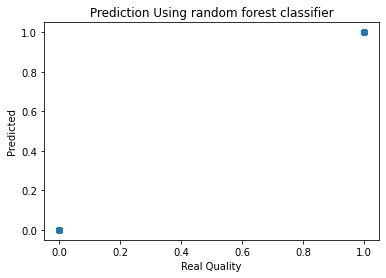

In [154]:
plt.scatter(y_test,y_pred)
plt.title("Prediction Using random forest classifier")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

In [155]:
type(clf)

sklearn.model_selection._search.GridSearchCV

In [156]:
clf.best_estimator_

RandomForestClassifier(max_depth=4, max_features='log2')

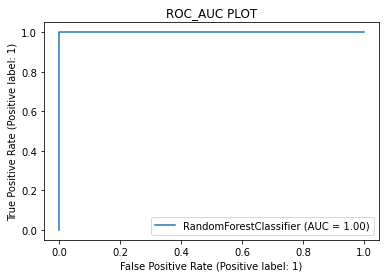

In [157]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf.best_estimator_,X_test,y_test)
plt.title("ROC_AUC PLOT")
plt.show()   

In [158]:
#CONCLUSION
#In this project, we build various models like logistic regression, knn classifier, support vector classifier, decision tree classifier, random forest classifier.

#A hyperparameter tuned Random Forest classifier gives the highest accuracy score of 100% and cross val score of 100%.and f1 score of 100%

#saving the model to local file system

In [159]:
filename='rainfall prediction_model.pickle'
pickle.dump(rf,open(filename,'wb'))

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [173]:
#dropping target column and unwanted columns:
X = df.drop(columns=['RainToday','RainTomorrow'])
y = df['RainTomorrow']

In [174]:
#Data scaling Z=(X-mean)/std

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_scaled.shape[1]

21

In [175]:
rf = RandomForestRegressor()
for i in range(0,100):
    X_train,X_test,y_train,y_test =train_test_split(X_scaled,y,test_size=0.2,random_state=i)
    rf.fit(X_train,y_train)
    pred_train = rf.predict(X_train)
    pred_test= rf.predict(X_test)
    print(f"At random state{i},the training accuracy is:-{r2_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is:-{r2_score(y_test,pred_test)}")
    print("\n")

At random state0,the training accuracy is:-0.936400975594757
At random state0,the testing accuracy is:-0.5610532211165551


At random state1,the training accuracy is:-0.9344981684134323
At random state1,the testing accuracy is:-0.5508788980328474


At random state2,the training accuracy is:-0.9362417930921484
At random state2,the testing accuracy is:-0.5612441056369981


At random state3,the training accuracy is:-0.9360268396631453
At random state3,the testing accuracy is:-0.5313746818762797


At random state4,the training accuracy is:-0.9355572404475418
At random state4,the testing accuracy is:-0.5331923353939751


At random state5,the training accuracy is:-0.9361866802490246
At random state5,the testing accuracy is:-0.5399619090392618


At random state6,the training accuracy is:-0.9368608552365133
At random state6,the testing accuracy is:-0.5385636828446296


At random state7,the training accuracy is:-0.9371694957401562
At random state7,the testing accuracy is:-0.5171155504618385


A

In [177]:
#so as we can interpret random state 42 is giving best train and test accuracy,so we train our model at random state 42:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
y_pred=rf.predict(X_test)
rfs=r2_score(y_test,y_pred)
print('R2 score:',rfs*100)

rfscore=cross_val_score(rf,X,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

R2 score: 58.34981292077441
cross val score: 42.22054276913205


In [178]:
y_pred=rf.predict(X_test)
y_train.head()

7384    0
1739    0
5133    0
1406    0
1561    0
Name: RainTomorrow, dtype: int32

In [179]:
#Adjusted R2 score
rf.score(X_train,y_train)

0.9342216987364969

In [180]:
rf.score(X_test,y_test)

0.5834981292077441

In [182]:
#lets plot and visualize
y_pred=rf.predict(X_test)
y_pred

array([0.12, 0.35, 0.14, ..., 0.47, 0.02, 0.12])

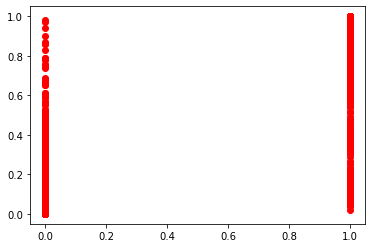

In [183]:
plt.scatter(y_test,y_pred,color='r')
plt.xlabel='actual PRICE'
plt.ylabel='Predicted PRICE'
plt.title='Actual vs model predicted '
plt.show()

In [184]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 0.17316320474777447
MSE: 0.07151323442136498
RMSE: 0.26741958496221807


In [185]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
y_pred=dt.predict(X_test)
dtr=r2_score(y_test,y_pred)
print('R2 score:',dtr*100)

dtscore=cross_val_score(dt,X,y,cv=5)
dtr=dtscore.mean()
print('cross val score:',dtr*100)

R2 score: 20.501585660541465
cross val score: -15.043884586127913


In [186]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 0.13649851632047477
MSE: 0.13649851632047477
RMSE: 0.3694570561248963


In [187]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X_train,y_train)
model.score(X_train,y_train)
y_pred=model.predict(X_test)
modelr=r2_score(y_test,y_pred)
print('R2 score:',modelr*100)
modelscore=cross_val_score(model,X,y,cv=5)
modelr=modelscore.mean()
print('cross val score:',modelr*100)

R2 score: 62.73815995684049
cross val score: 47.05833158104499


In [188]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 0.13770326409495548
MSE: 0.06397845697329377
RMSE: 0.2529396310847586


In [189]:
import xgboost as xgb
from xgboost import XGBRegressor
xg=XGBRegressor()

In [190]:
xg.fit(X_train,y_train)
xg.score(X_train,y_train)
y_pred=xg.predict(X_test)
xg_score=r2_score(y_test,y_pred)
print('R2 score:',xg_score*100)
xgscore=cross_val_score(xg,X,y,cv=5)
xgr=dtscore.mean()
print('cross val score:',xgr*100)

R2 score: 56.23440863289788
cross val score: -15.043884586127913


In [191]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 0.17315560375516115
MSE: 0.07514537663592734
RMSE: 0.27412657046686906


In [192]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(X_train,y_train)
ada.score(X_train,y_train)
y_pred=ada.predict(X_test)
ada_score=r2_score(y_test,y_pred)
print('R2 score:',ada_score*100)

adascore=cross_val_score(ada,X,y,cv=5)
adab=adascore.mean()
print('cross val score:',adab*100)

R2 score: 28.728440276428525
cross val score: 25.237844695709217


In [193]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 0.287974033696485
MSE: 0.12237303396484164
RMSE: 0.349818572927227


In [203]:
#as observed the extra tress regressor works well with this dataset...so we hypertune parameters of final model extratressRegressor using gridsearchCV

parameters ={'n_estimators':[100], 'criterion':['squared_error'], 
             'max_depth':[None], 'min_samples_split':[2], 'min_samples_leaf':[1],
             'max_features':[1.0], 'max_leaf_nodes':[None], 
              'bootstrap':[False], 'n_jobs':[None]}

In [204]:
model = ExtraTreesRegressor()
gcv=GridSearchCV(model,parameters)
gcv.fit(X_train,y_train)
print(gcv.best_params_)

{'bootstrap': False, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': None}


In [205]:
model = ExtraTreesRegressor(bootstrap= False, criterion='squared_error', max_depth= None, max_features=1.0,
                            max_leaf_nodes=None, min_samples_leaf= 1, min_samples_split= 2,
                            n_estimators=100, n_jobs=None)
model.fit(X_train,y_train)
model.score(X_train,y_train)
y_pred=model.predict(X_test)
modelr=r2_score(y_test,y_pred)
print('R2 score:',modelr*100)
modelscore=cross_val_score(model,X,y,cv=5)
modelr=modelscore.mean()
print('cross val score:',modelr*100)

R2 score: 62.61020207428194
cross val score: 46.87997628383337


In [206]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 0.13855786350148366
MSE: 0.06419816023738872
RMSE: 0.2533735586784634


In [ ]:
#the best model is extra tree Regressor with 62% accuracy
#MAE: 0.13855786350148366
#MSE: 0.06419816023738872
#RMSE: 0.2533735586784634

In [207]:
#saving the model to local file system
filename='rainfall prediction_model.pickle'
pickle.dump(model,open(filename,'wb'))